In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse 
from surprise import Reader, Dataset
from sklearn.metrics. pairwise import cosine_similarity
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

Loading of the data sets.

In [4]:
# Loading link.csv
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
#loading movies.csv
movies = pd.read_csv('movies.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#loading the ratings.csv
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
#loading the tags.csv
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Cleaning the data sets.

Ratings dataset

In [8]:
# Checking for null values in the dataset
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
# ratings = ratings.drop(columns='timestamp')
# ratings.head()

Links Dataset.

In [10]:
#  Checking for null values in the dataset.
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [11]:
# Checking for null values in the movies dataset.
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
# Checking for null vales in the tags dataset.
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Exploratory Data Analysis.

In [15]:
# Extract the genre information for each movie
genres = [genre.split('|') for genre in movies['genres']]

# Filter out movies without genres and extract genre information
filtered_genres = []
for genre_str in movies['genres']:
    if genre_str != 'No genres listed':  
        genres = genre_str.split('|')
        filtered_genres.append(genres)

# Create genre counts dictionary
genre_counts = {}
for genre_list in filtered_genres:
    for genre in genre_list:
        if genre in genre_counts:  genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1
# Sort the genres by their count, in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

#Print the genres and their counts
for genre, count in sorted_genres:
    print(f'{genre}: {count} movies')

Drama: 4361 movies
Comedy: 3756 movies
Thriller: 1894 movies
Action: 1828 movies
Romance: 1596 movies
Adventure: 1263 movies
Crime: 1199 movies
Sci-Fi: 980 movies
Horror: 978 movies
Fantasy: 779 movies
Children: 664 movies
Animation: 611 movies
Mystery: 573 movies
Documentary: 440 movies
War: 382 movies
Musical: 334 movies
Western: 167 movies
IMAX: 158 movies
Film-Noir: 87 movies
(no genres listed): 34 movies


In [18]:
import matplotlib.pyplot as plt

# Assuming you have a list of genres called filtered_genres
# Initialize an empty dictionary to store genre counts
genre_counts = {}

# Iterate through each list of genres in filtered_genres
for genre_list in filtered_genres:
    # Iterate through each genre in the list
    for genre in genre_list:
        # If the genre is already in the genre_counts dictionary, increment its count
        if genre in genre_counts:
            genre_counts[genre] += 1
        #genre_counts[genre] += 1
        # If the genre is not in the dictionary, add it with a count of 1
        else:
            genre_counts[genre] = 1

# Sort the genre counts dictionary by values (movie counts) in ascending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1])



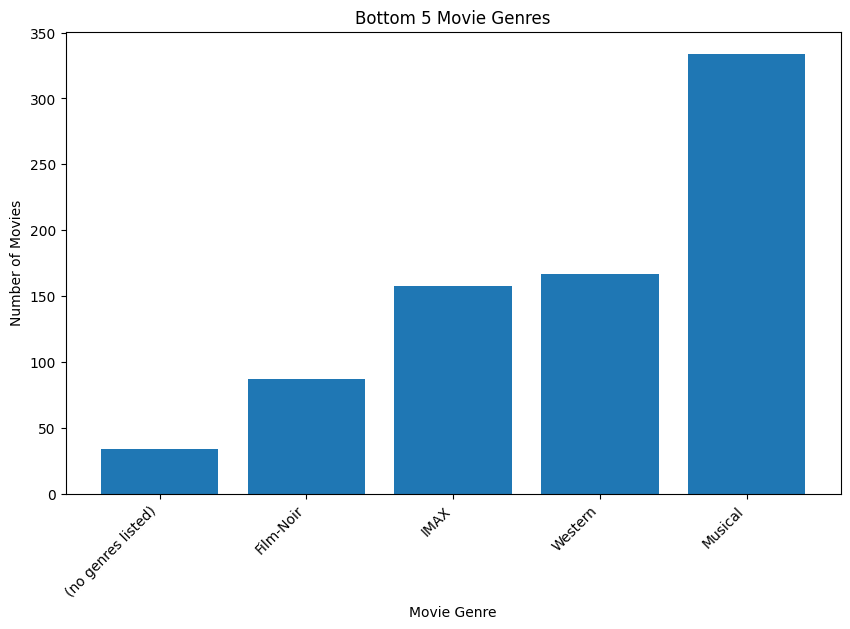

In [19]:
# Extract genre labels and movie counts for the bottom 5 genres
bottom_genre_labels = [genre for genre, count in sorted_genres[:5]]
bottom_movie_counts = [count for genre, count in sorted_genres[:5]]
# Create a bar chart to visualize genre vs movie count for the bottom 5 genres
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
plt.bar(bottom_genre_labels, bottom_movie_counts)
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
plt.title('Bottom 5 Movie Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show() 
 # Display the plot

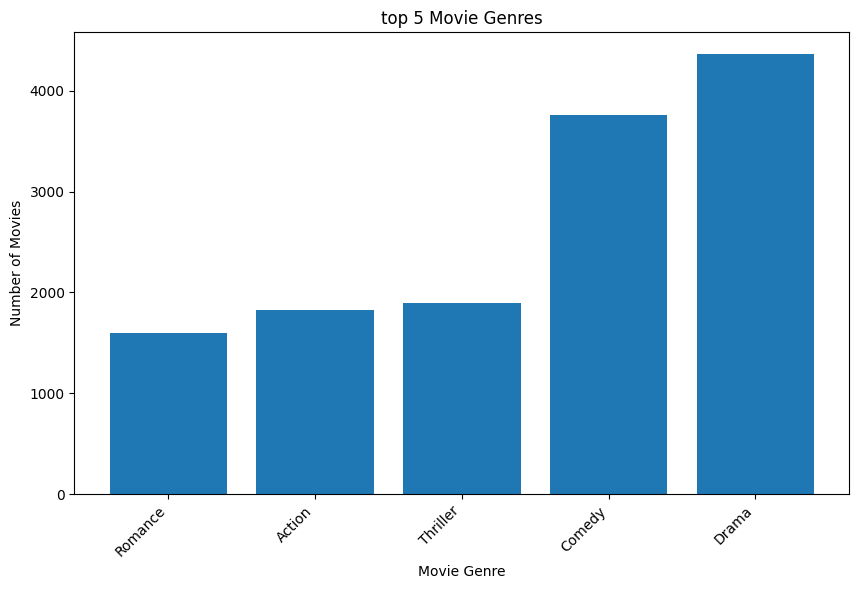

In [23]:
# Extract genre labels and movie counts for the top 5 genres
top_genre_labels = [genre for genre, count in sorted_genres[-5:]]
top_movie_counts = [count for genre, count in sorted_genres[-5:]]
# Create a bar chart to visualize genre vs movie count for the top 5 genres
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
plt.bar(top_genre_labels, top_movie_counts)
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
plt.title('top 5 Movie Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show() 
 # Display the plot

In [24]:
# Merge the datasets using the movie id column
merged_data = pd.merge(links, movies, on='movieId')
merged_data = pd.merge(merged_data, tags, on='movieId')
merged_data = pd.merge(merged_data, ratings, on='movieId')


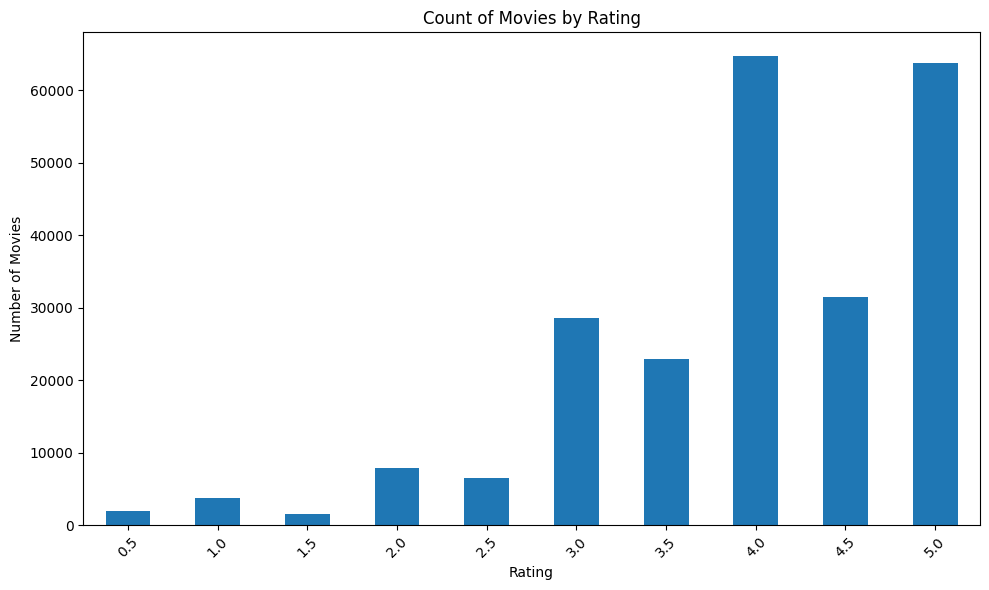

In [29]:
rating_counts = merged_data.groupby('rating').size()

# Plotting the count of movies with varying ratings
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.title('Count of Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()